In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns


### handing Data Inbalancess

In [2]:
df = pd.read_csv(r'D:\Uni Docs\DSC4996\Dynamic_fraud_detection_system\Data\pre_processed_df.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
features = df.drop('Class',axis=1)
target = df['Class']

In [5]:
scaler = StandardScaler()
features[['Time','Amount']] = scaler.fit_transform(features[['Time','Amount']])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state=1234)

In [28]:
smt = SMOTETomek(random_state=1234)
features_res, target_res = smt.fit_resample(X_train,y_train)

In [8]:
features_res

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.346138,-1.527320,0.779664,-0.445973,0.643763,1.895486,-0.796104,1.724027,-0.800979,-0.221175,...,-0.226268,-0.138018,0.926099,0.200032,-0.453845,0.250378,-0.391996,0.182858,-0.199368,-0.342983
1,0.623659,-1.519917,0.526017,-0.639762,-0.259347,1.349284,-0.731700,1.163112,0.086371,-0.281868,...,-0.180858,-0.126471,-0.007501,0.190798,-0.732528,0.486099,-0.291913,-0.176798,-0.220036,-0.007479
2,0.670857,-0.514506,1.286994,0.650569,0.540156,1.213316,-0.162808,1.404228,-0.100791,-1.222849,...,-0.053904,0.072625,0.318634,-0.697490,-0.453357,1.150725,-0.216960,0.033738,0.031053,-0.349333
3,0.457845,1.587175,-0.453310,-2.087155,1.451973,0.290527,-1.346326,1.095772,-0.540976,-0.086642,...,0.166244,0.268635,0.310333,-0.215560,-0.017962,0.347086,-0.505316,-0.079331,-0.022545,0.645080
4,1.240748,2.081615,-0.281525,-1.668173,0.141096,0.126756,-0.768274,0.051380,-0.163150,0.524772,...,-0.296539,0.334237,1.105051,-0.158765,-0.415416,0.324267,1.024460,-0.108892,-0.097889,-0.340667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453207,-0.438156,-4.199420,-2.831137,-1.304464,2.485428,7.360099,-4.568866,-7.644665,-0.201740,1.427417,...,-1.759106,0.358443,-0.980397,-11.293976,-0.335949,-2.533825,-0.121599,1.209723,-0.412260,-0.330397
453208,-1.024292,0.298027,0.527967,0.123679,1.214763,0.487041,0.057080,0.238639,0.153748,-0.058039,...,-0.011765,-0.142212,-0.441659,-0.150365,-0.705501,0.353199,-0.341512,-0.010068,0.038963,-0.129005
453209,-1.016059,-0.265991,0.491662,1.858242,-0.951262,-0.517717,-0.692899,0.186822,-0.037716,0.912994,...,-0.012950,0.205589,0.852813,-0.283051,0.450034,0.164694,-0.502587,0.076776,0.015339,-0.346904
453210,-1.129439,-7.474146,5.065303,-8.451348,8.122413,-7.392779,-2.381247,-11.618411,4.739073,-6.645816,...,0.704093,2.254205,0.255692,-0.002442,0.628437,0.049815,0.234262,1.334223,0.288385,-0.317665


### Model Traning - 01

#### Logistic Regression Model

In [9]:
lgt = LogisticRegression()
lgt.fit(features_res, target_res)

LogisticRegression()

In [10]:
y_pred = lgt.predict(X_test)

In [11]:
accuracy_lgt = accuracy_score(y_test, y_pred)
precision_lgt = precision_score(y_test, y_pred)
recall_lgt = recall_score(y_test, y_pred)
f1_score_lgt = f1_score(y_test, y_pred)
mcc_lgt = matthews_corrcoef(y_test, y_pred)

print("Accuracy:", accuracy_lgt)
print("Precision:", precision_lgt)
print("Recall:", recall_lgt)
print("F1-score:", f1_score_lgt)
print("MCC:", mcc_lgt)

Accuracy: 0.9737602650407077
Precision: 0.05732484076433121
Recall: 0.9090909090909091
F1-score: 0.1078490113840623
MCC: 0.2246592034150974


#### SVM Model

In [12]:
svm = SVC()

svm.fit(features_res, target_res)

SVC()

In [13]:
y_pred_svm = svm.predict(X_test)

In [14]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_score_svm = f1_score(y_test, y_pred_svm)
mcc_svm = matthews_corrcoef(y_test, y_pred_svm)

print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_score_svm)
print("MCC:", mcc_svm)

Accuracy: 0.9863426497021817
Precision: 0.10047281323877069
Recall: 0.8585858585858586
F1-score: 0.1798941798941799
MCC: 0.29103798974050626


#### Decision Tree

In [15]:
dtree = DecisionTreeClassifier()

dtree.fit(features_res, target_res)

DecisionTreeClassifier()

In [16]:
y_pred_dtree = dtree.predict(X_test)

In [17]:
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
precision_dtree = precision_score(y_test, y_pred_dtree)
recall_dtree = recall_score(y_test, y_pred_dtree)
f1_score_dtree = f1_score(y_test, y_pred_dtree)
mcc_dtree = matthews_corrcoef(y_test, y_pred_dtree)

print("Accuracy:", accuracy_dtree)
print("Precision:", precision_dtree)
print("Recall:", recall_dtree)
print("F1-score:", f1_score_dtree)
print("MCC:", mcc_dtree)

Accuracy: 0.9973566418778416
Precision: 0.37185929648241206
Recall: 0.7474747474747475
F1-score: 0.4966442953020135
MCC: 0.5261229709247855


### CNN

In [29]:
features_res1 = features_res.to_numpy()
target_res1 = target_res.to_numpy()
X_test1 = X_test.to_numpy()
y_test1 = y_test.to_numpy()

In [38]:
features_res1 = features_res1.reshape(features_res1.shape[0],features_res1.shape[1],1)
X_test1 = X_test1.reshape(X_test1.shape[0],X_test1.shape[1],1)
features_res1.shape, X_test1.shape

((453212, 30, 1), (56746, 30, 1))

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

In [41]:
#import model
model=Sequential()

In [43]:
# layers
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=features_res1[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# build ANN
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))

In [46]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
# fitting the model
cnn_fit =model.fit(features_res1,target_res1,epochs=20,validation_data=(X_test1,y_test1))

Epoch 1/20
14163/14163 [==============================] - 54s 4ms/step - loss: 0.9556 - accuracy: 0.9363 - val_loss: 0.1640 - val_accuracy: 0.9891
Epoch 2/20
14163/14163 [==============================] - 52s 4ms/step - loss: 0.9113 - accuracy: 0.9405 - val_loss: 0.3774 - val_accuracy: 0.9749
Epoch 3/20
14163/14163 [==============================] - 51s 4ms/step - loss: 0.8203 - accuracy: 0.9464 - val_loss: 0.1331 - val_accuracy: 0.9913
Epoch 4/20
14163/14163 [==============================] - 51s 4ms/step - loss: 0.7274 - accuracy: 0.9524 - val_loss: 0.2025 - val_accuracy: 0.9867
Epoch 5/20
14163/14163 [==============================] - 53s 4ms/step - loss: 0.6764 - accuracy: 0.9557 - val_loss: 0.4254 - val_accuracy: 0.9719
Epoch 6/20
14163/14163 [==============================] - 60s 4ms/step - loss: 0.6085 - accuracy: 0.9603 - val_loss: 0.1647 - val_accuracy: 0.9891
Epoch 7/20
14163/14163 [==============================] - 64s 5ms/step - loss: 0.5750 - accuracy: 0.9624 - val_loss: 0

In [57]:
# plot
def plot_learningcurve(cnn_fit,epochs):
  epoch=range(1,epochs+1)
  # accuracy
  plt.plot(epoch, cnn_fit.history['accuracy'])
  plt.plot(epoch, cnn_fit.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['train','val'], loc='upper left')
  plt.show()

  # loss
  plt.plot(epoch, cnn_fit.history['loss'])
  plt.plot(epoch, cnn_fit.history['val_loss'])
  plt.title('Model loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train','val'], loc='upper left')
  plt.show()

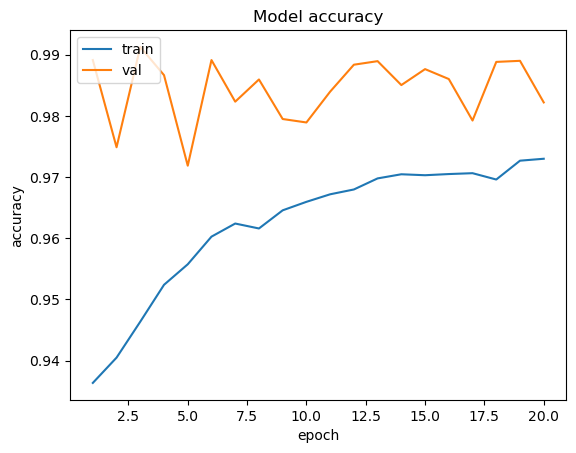

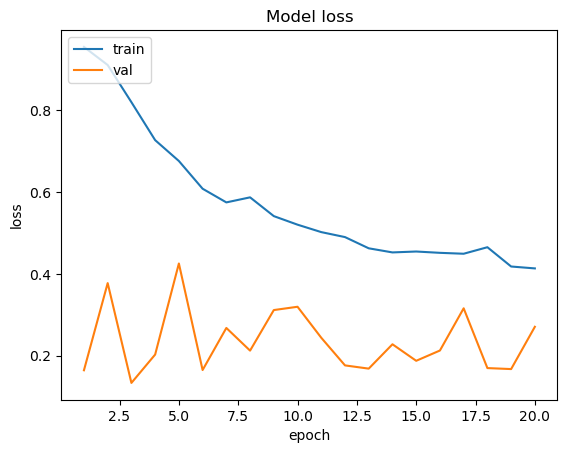

In [58]:
plot_learningcurve(cnn_fit,20)

In [59]:
y_pred_cnn = model.predict(X_test1)

1774/1774 [==============================] - 2s 1ms/step


In [63]:
import numpy as np

def predict_classes(probs, threshold=0.5):

  classes = np.zeros_like(probs, dtype=int)
  classes[probs >= threshold] = 1
  return classes


In [66]:
preds = predict_classes(y_pred_cnn)

In [68]:
accuracy_cnn = accuracy_score(y_test1, preds)
precision_cnn = precision_score(y_test1, preds)
recall_cnn = recall_score(y_test1, preds)
f1_score_cnn = f1_score(y_test1, preds)
mcc_cnn = matthews_corrcoef(y_test1, preds)

print("Accuracy:", accuracy_cnn)
print("Precision:", precision_cnn)
print("F1-score:", f1_score_cnn)
print("Recall:", recall_cnn)
print("MCC:", mcc_cnn)

Accuracy: 0.9822013886441335
Precision: 0.08095676172953081
F1-score: 0.148397976391231
Recall: 0.8888888888888888
MCC: 0.26525772908902734
